In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats 
from scipy import stats

In [2]:
"""Load dataset in a DataFrame"""
df = pd.read_csv(r'../../data/API/old/jan_2021_to_feb_2022_linear_output_with_attributes.csv')
df

,match_id,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,...,radiant_str,radiant_int,radiant_agi,radiant_melee,radiant_ranged,dire_str,dire_int,dire_agi,dire_melee,dire_ranged
0,5792362494,1,0,0,0,0,0,0,0,0,...,1,2,2,1,4,1,3,1,1,4
1,5794821137,-1,0,0,0,-1,1,0,0,0,...,2,2,1,2,3,2,2,1,3,2
2,5790226407,1,0,0,0,0,0,0,0,0,...,1,1,3,2,3,3,1,1,3,2
3,5790375758,1,0,0,0,0,0,0,0,0,...,2,3,0,2,3,2,2,1,3,2
4,5790649968,-1,0,0,0,0,0,0,0,0,...,2,3,0,2,3,4,0,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12381,6437920662,1,0,0,0,0,0,0,0,0,...,2,2,1,3,2,2,2,1,3,2
12382,6453048875,-1,0,0,0,0,0,0,0,0,...,1,2,2,2,3,1,2,2,1,4
12383,6409570374,-1,0,0,-1,0,0,0,0,0,...,1,1,3,2,3,1,4,0,2,3
12384,6437061441,-1,1,0,0,0,0,0,0,0,...,2,1,2,2,3,2,3,0,2,3


In [3]:
# check missing data
df.isnull().values.any()

False

In [4]:
# delete cluster_id
df.drop(['match_id'], axis=1, inplace=True)

In [5]:
# sns.set(rc = {'figure.figsize':(5,5)})
# sns.countplot(data=df, x='game_mode')

In [6]:
# sns.set(rc = {'figure.figsize':(5,5)})
# sns.countplot(data=df, x='game_type')

In [7]:
#group1 winning team: 1; gropu2 winning team: -1
group1 = df[df["match_result"] == 1]
group2 = df[df["match_result"] == -1]

In [8]:
group1

,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,9_mirana,...,radiant_str,radiant_int,radiant_agi,radiant_melee,radiant_ranged,dire_str,dire_int,dire_agi,dire_melee,dire_ranged
0,1,0,0,0,0,0,0,0,0,0,...,1,2,2,1,4,1,3,1,1,4
2,1,0,0,0,0,0,0,0,0,0,...,1,1,3,2,3,3,1,1,3,2
3,1,0,0,0,0,0,0,0,0,0,...,2,3,0,2,3,2,2,1,3,2
5,1,1,0,0,0,0,0,0,0,0,...,0,2,3,3,2,2,1,2,3,2
6,1,0,0,0,0,0,0,0,0,0,...,3,1,1,4,1,2,1,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12377,1,-1,0,0,0,0,0,0,0,0,...,2,1,2,2,3,1,3,1,2,3
12378,1,0,0,0,0,0,0,0,0,0,...,2,3,0,2,3,2,2,1,1,4
12379,1,0,0,-1,0,0,0,0,0,0,...,2,3,0,2,3,2,2,1,2,3
12381,1,0,0,0,0,0,0,0,0,0,...,2,2,1,3,2,2,2,1,3,2


In [9]:
group2

,match_result,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,9_mirana,...,radiant_str,radiant_int,radiant_agi,radiant_melee,radiant_ranged,dire_str,dire_int,dire_agi,dire_melee,dire_ranged
1,-1,0,0,0,-1,1,0,0,0,0,...,2,2,1,2,3,2,2,1,3,2
4,-1,0,0,0,0,0,0,0,0,0,...,2,3,0,2,3,4,0,1,4,1
8,-1,0,0,0,0,0,0,0,0,0,...,2,1,2,2,3,3,2,0,3,2
9,-1,0,0,0,0,0,0,1,1,0,...,2,2,1,4,1,1,2,2,1,4
10,-1,0,0,0,0,0,0,-1,0,0,...,1,2,2,1,4,2,1,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12376,-1,0,-1,0,0,0,0,0,0,0,...,1,3,1,3,2,2,2,1,1,4
12380,-1,0,0,0,0,0,0,0,0,0,...,2,2,1,2,3,0,3,2,1,4
12382,-1,0,0,0,0,0,0,0,0,0,...,1,2,2,2,3,1,2,2,1,4
12383,-1,0,0,-1,0,0,0,0,0,0,...,1,1,3,2,3,1,4,0,2,3


<AxesSubplot:>

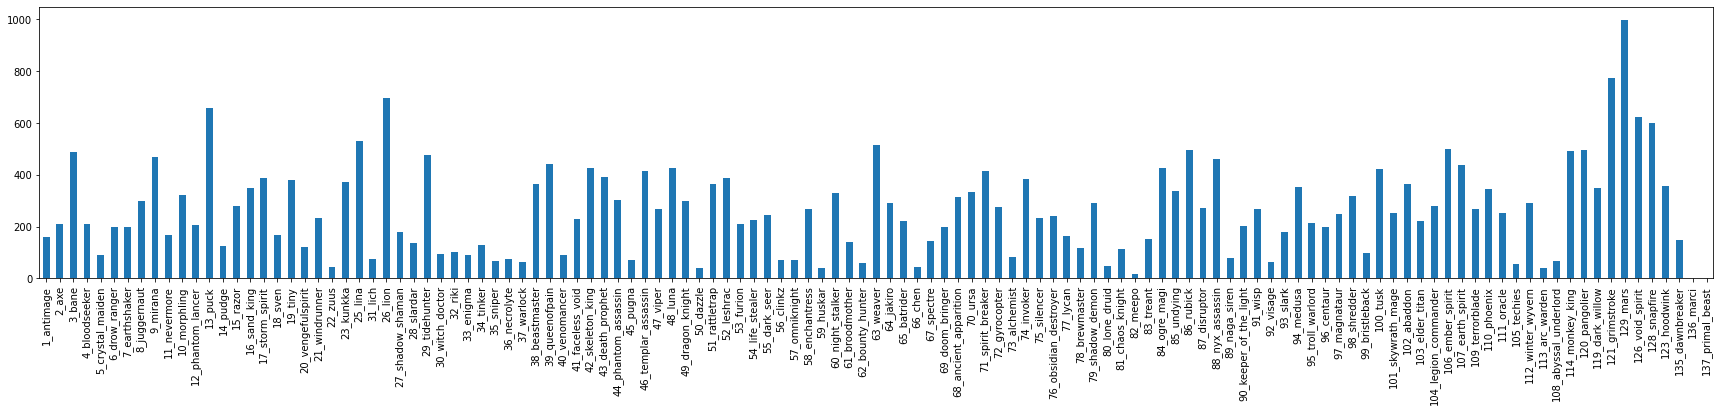

In [26]:
# group1 winning team heroes 
count_group1_winning = group1[group1 == 1].sum(axis=0)[1:124]
count_group1_winning.plot.bar(figsize=(30,5))

<AxesSubplot:>

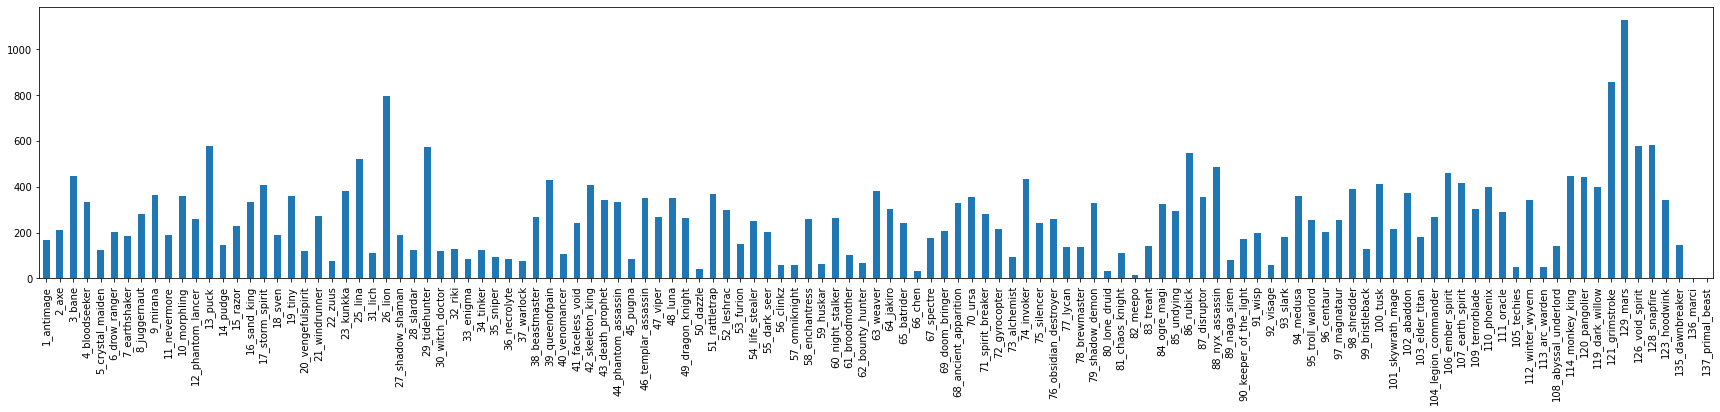

In [27]:
# group1 losing team heroes
count_group1_losing = group1[group1 == -1].sum(axis=0)[1:124]
count_group1_losing.abs().plot.bar(figsize=(30,5))

<AxesSubplot:>

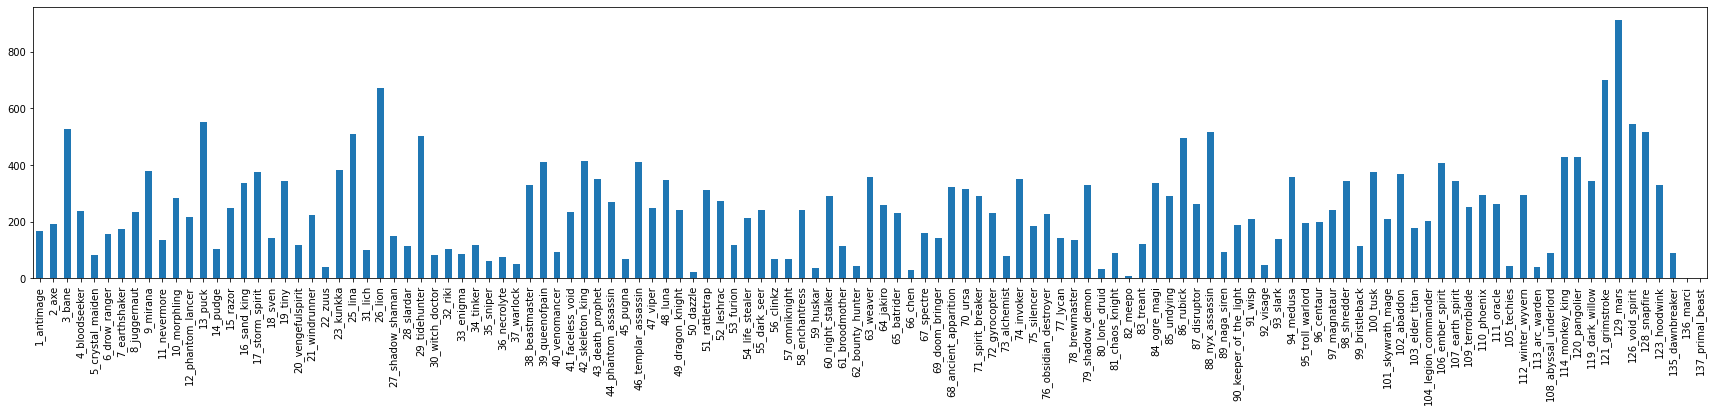

In [28]:
# group2 winning team heroes
count_group2_winning = group2[group2 == -1].sum(axis=0)[1:124]
count_group2_winning.abs().plot.bar(figsize=(30,5))

<AxesSubplot:>

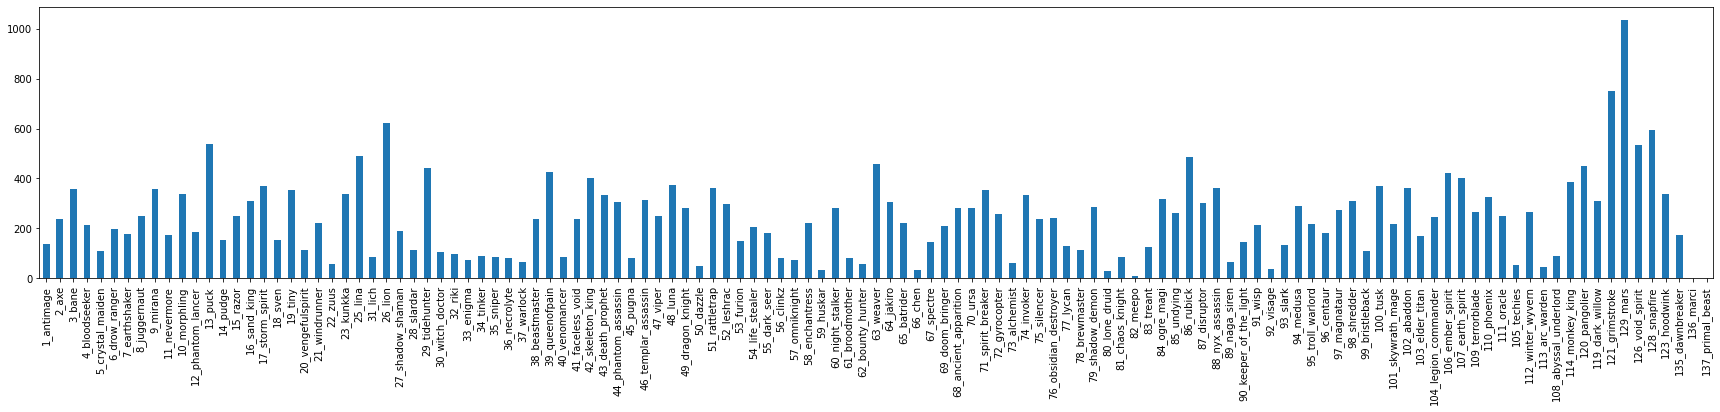

In [29]:
# group2 losing team heroes
count_group2_losing = group2[group2 == 1].sum(axis=0)[1:124]
count_group2_losing.plot.bar(figsize=(30,5))

<AxesSubplot:>

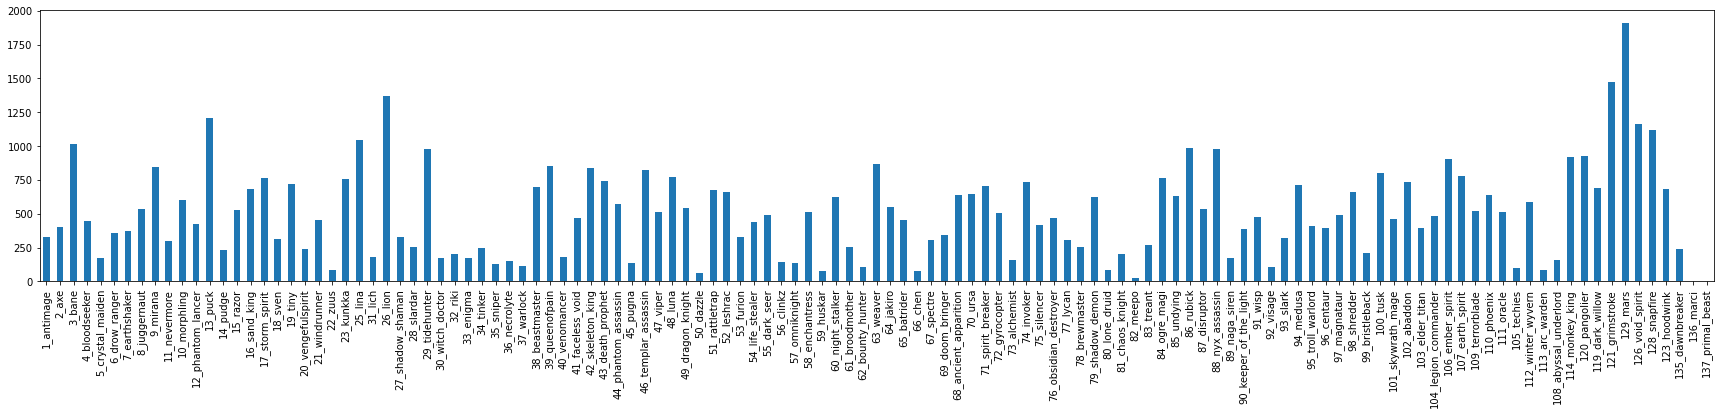

In [31]:
# count all winning 
count_all_winning = count_group1_winning + count_group2_winning.abs()
count_all_winning.plot.bar(figsize=(30,5))

<AxesSubplot:>

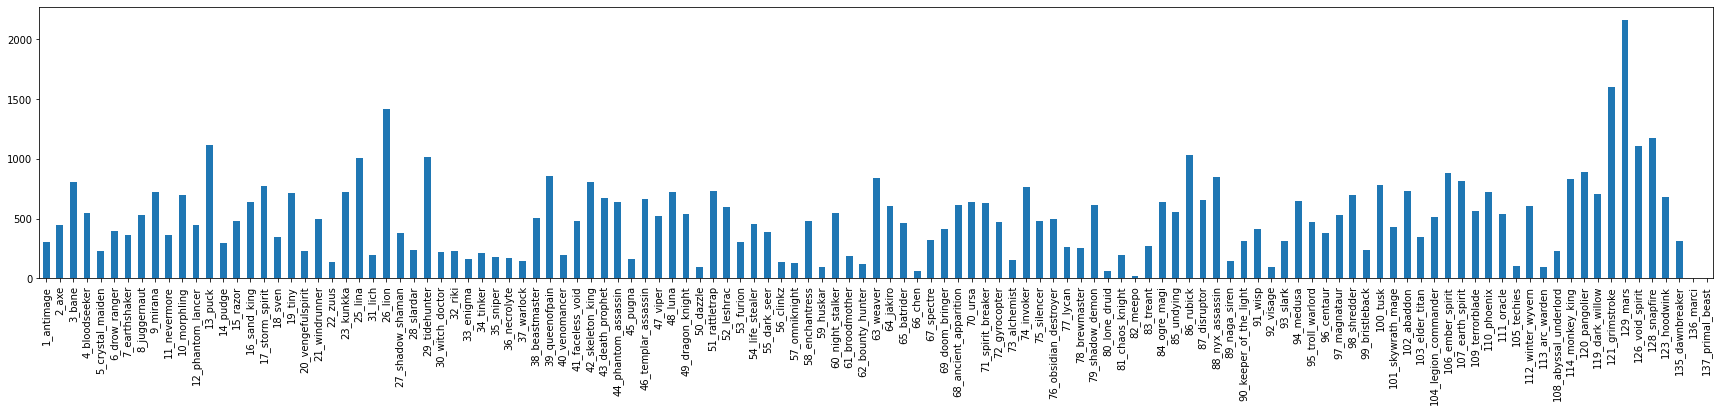

In [32]:
# count all losing
count_all_losing = count_group1_losing.abs() + count_group2_losing
count_all_losing.plot.bar(figsize=(30,5))

In [33]:
#top 10 used heroes between winning and losing (among all groups)
print('winning team heroes counts')
print(count_all_winning.nlargest(n=10))
print('\n')
print('losing team heroes counts')
print(count_all_losing.nlargest(n=10))

winning team heroes counts
129_mars           1912.0
121_grimstroke     1471.0
26_lion            1369.0
13_puck            1209.0
126_void_spirit    1166.0
128_snapfire       1116.0
25_lina            1041.0
3_bane             1015.0
86_rubick           988.0
29_tidehunter       979.0
dtype: float64


losing team heroes counts
129_mars           2165.0
121_grimstroke     1605.0
26_lion            1419.0
128_snapfire       1176.0
13_puck            1115.0
126_void_spirit    1111.0
86_rubick          1030.0
29_tidehunter      1017.0
25_lina            1008.0
120_pangolier       892.0
dtype: float64


In [37]:
#group1 heroes
group1_heroes = group1.iloc[:,1:124]
group1_heroes

,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,9_mirana,11_nevermore,...,120_pangolier,119_dark_willow,121_grimstroke,129_mars,126_void_spirit,128_snapfire,123_hoodwink,135_dawnbreaker,136_marci,137_primal_beast
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,-1,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12377,-1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12378,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
12379,0,0,-1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12381,0,0,0,0,0,0,0,0,0,0,...,0,1,-1,0,0,0,0,0,0,0


In [38]:
# group2 heroes
group2_heroes = group2.iloc[:,1:124]
group2_heroes

,1_antimage,2_axe,3_bane,4_bloodseeker,5_crystal_maiden,6_drow_ranger,7_earthshaker,8_juggernaut,9_mirana,11_nevermore,...,120_pangolier,119_dark_willow,121_grimstroke,129_mars,126_void_spirit,128_snapfire,123_hoodwink,135_dawnbreaker,136_marci,137_primal_beast
1,0,0,0,-1,1,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
9,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
10,0,0,0,0,0,0,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12376,0,-1,0,0,0,0,0,0,0,0,...,0,-1,1,0,0,0,0,0,0,0
12380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,-1,0,0,0,0,0
12382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1,0,0,0,0,0,0
12383,0,0,-1,0,0,0,0,0,0,0,...,0,0,-1,0,1,0,1,0,0,0


In [90]:

# Get winning heroes combination from group1
gp1_winning_heroes = []
for row in range(len(group1_heroes)):
  combination = []
  for col in group1_heroes:
    if group1.iloc[row][col] == 1:
      hero = col
      combination.append(hero)
  gp1_winning_heroes.append(combination)
print(len(gp1_winning_heroes))


6490


In [157]:
gp1_winning_heroes

[['21_windrunner', '47_viper', '85_undying', '86_rubick', '95_troll_warlord'],
 ['11_nevermore',
  '63_weaver',
  '88_nyx_assassin',
  '108_abyssal_underlord',
  '121_grimstroke'],
 ['22_zuus', '28_slardar', '42_skeleton_king', '86_rubick', '119_dark_willow'],
 ['1_antimage', '33_enigma', '55_dark_seer', '56_clinkz', '88_nyx_assassin'],
 ['51_rattletrap', '70_ursa', '110_phoenix', '129_mars', '126_void_spirit'],
 ['5_crystal_maiden',
  '16_sand_king',
  '27_shadow_shaman',
  '109_terrorblade',
  '126_void_spirit'],
 ['44_phantom_assassin',
  '55_dark_seer',
  '64_jakiro',
  '74_invoker',
  '88_nyx_assassin'],
 ['13_puck',
  '103_elder_titan',
  '112_winter_wyvern',
  '114_monkey_king',
  '120_pangolier'],
 ['63_weaver',
  '68_ancient_apparition',
  '81_chaos_knight',
  '92_visage',
  '100_tusk'],
 ['19_tiny', '63_weaver', '74_invoker', '88_nyx_assassin', '110_phoenix'],
 ['10_morphling',
  '65_batrider',
  '69_doom_bringer',
  '86_rubick',
  '120_pangolier'],
 ['7_earthshaker',
  '13_p

In [149]:
df1 = pd.DataFrame(gp1_winning_heroes)
df1 = df1.rename(columns={0:'Heroe_1', 1:'Heroe_2', 2:'Heroe_3', 3:'Heroe_4', 4:'Heroe_5'})
df1

,Heroe_1,Heroe_2,Heroe_3,Heroe_4,Heroe_5
0,21_windrunner,47_viper,85_undying,86_rubick,95_troll_warlord
1,11_nevermore,63_weaver,88_nyx_assassin,108_abyssal_underlord,121_grimstroke
2,22_zuus,28_slardar,42_skeleton_king,86_rubick,119_dark_willow
3,1_antimage,33_enigma,55_dark_seer,56_clinkz,88_nyx_assassin
4,51_rattletrap,70_ursa,110_phoenix,129_mars,126_void_spirit
...,...,...,...,...,...
6485,28_slardar,39_queenofpain,63_weaver,83_treant,94_medusa
6486,13_puck,19_tiny,112_winter_wyvern,121_grimstroke,129_mars
6487,38_beastmaster,39_queenofpain,42_skeleton_king,64_jakiro,86_rubick
6488,29_tidehunter,42_skeleton_king,106_ember_spirit,111_oracle,119_dark_willow


In [156]:
df1[['Heroe_1', 'Heroe_2', 'Heroe_3', 'Heroe_4','Heroe_5']].value_counts()

Heroe_1        Heroe_2            Heroe_3               Heroe_4           Heroe_5        
2_axe          26_lion            42_skeleton_king      74_invoker        102_abaddon        3
48_luna        84_ogre_magi       86_rubick             129_mars          126_void_spirit    2
51_rattletrap  65_batrider        94_medusa             129_mars          128_snapfire       2
19_tiny        71_spirit_breaker  91_wisp               94_medusa         100_tusk           2
13_puck        28_slardar         44_phantom_assassin   88_nyx_assassin   121_grimstroke     2
                                                                                            ..
21_windrunner  42_skeleton_king   64_jakiro             79_shadow_demon   81_chaos_knight    1
                                  104_legion_commander  105_techies       126_void_spirit    1
               41_faceless_void   71_spirit_breaker     89_naga_siren     128_snapfire       1
               40_venomancer      48_luna              

In [47]:
# Count winning combinations in group1
counts_gp1Combination_win = pd.Series(tuple(gp1_winning_heroes)).value_counts()
print(counts_gp1Combination_win.nlargest(n=10))

(2_axe, 26_lion, 42_skeleton_king, 74_invoker, 102_abaddon)                                3
(19_tiny, 71_spirit_breaker, 91_wisp, 94_medusa, 100_tusk)                                 2
(17_storm_spirit, 26_lion, 54_life_stealer, 98_shredder, 121_grimstroke)                   2
(13_puck, 38_beastmaster, 84_ogre_magi, 94_medusa, 101_skywrath_mage)                      2
(44_phantom_assassin, 58_enchantress, 71_spirit_breaker, 126_void_spirit, 128_snapfire)    2
(1_antimage, 17_storm_spirit, 26_lion, 37_warlock, 98_shredder)                            2
(11_nevermore, 26_lion, 29_tidehunter, 91_wisp, 103_elder_titan)                           2
(35_sniper, 41_faceless_void, 60_night_stalker, 75_silencer, 112_winter_wyvern)            2
(63_weaver, 79_shadow_demon, 107_earth_spirit, 114_monkey_king, 129_mars)                  2
(39_queenofpain, 48_luna, 71_spirit_breaker, 84_ogre_magi, 121_grimstroke)                 2
dtype: int64


In [43]:
# Get winning heroes combination from group2
gp2_winning_heroes =[]
for row in range(len(group2_heroes)):
  combination = []
  for col in group2_heroes:
    if group2.iloc[row][col] == -1:
      hero = col
      combination.append(hero)
  gp2_winning_heroes.append(tuple(combination))

print(len(gp2_winning_heroes))

5896


In [42]:
# Count the winning combinations in group2
counts_gp2Combination_win = pd.Series(gp2_winning_heroes).value_counts()
print(counts_gp2Combination_win.nlargest(n=10))

(19_tiny, 54_life_stealer, 68_ancient_apparition, 86_rubick, 97_magnataur)            3
(49_dragon_knight, 54_life_stealer, 58_enchantress, 74_invoker, 112_winter_wyvern)    2
(44_phantom_assassin, 58_enchantress, 65_batrider, 97_magnataur, 100_tusk)            2
(17_storm_spirit, 42_skeleton_king, 43_death_prophet, 86_rubick, 129_mars)            2
(4_bloodseeker, 13_puck, 28_slardar, 86_rubick, 121_grimstroke)                       2
(26_lion, 77_lycan, 95_troll_warlord, 98_shredder, 110_phoenix)                       2
(9_mirana, 29_tidehunter, 66_chen, 89_naga_siren, 106_ember_spirit)                   2
(17_storm_spirit, 55_dark_seer, 67_spectre, 88_nyx_assassin, 110_phoenix)             2
(13_puck, 26_lion, 85_undying, 109_terrorblade, 129_mars)                             2
(3_bane, 44_phantom_assassin, 86_rubick, 106_ember_spirit, 129_mars)                  2
dtype: int64


In [44]:
# Get losing heroes combination from group1
gp1_losing_heroes =[]
for row in range(len(group1_heroes)):
  combination = []
  for col in group1_heroes:
    if group1.iloc[row][col] == -1:
      hero = col
      combination.append(hero)
  gp1_losing_heroes.append(tuple(combination))

print(len(gp1_losing_heroes))

6490


In [ ]:
# Count losing combinations in group1
counts_gp1Combination_lose = pd.Series(gp1_losing_heroes).value_counts()
print(counts_gp1Combination_lose.nlargest(n=10))

[13_puck, 69_doom_bringer, 88_nyx_assassin, 113_arc_warden, 128_snapfire]        3
[13_puck, 25_lina, 54_life_stealer, 61_broodmother, 121_grimstroke]              3
[65_batrider, 74_invoker, 91_wisp, 94_medusa, 110_phoenix]                       2
[7_earthshaker, 31_lich, 43_death_prophet, 47_viper, 73_alchemist]               2
[2_axe, 6_drow_ranger, 26_lion, 49_dragon_knight, 103_elder_titan]               2
[29_tidehunter, 63_weaver, 103_elder_titan, 109_terrorblade, 126_void_spirit]    2
[12_phantom_lancer, 13_puck, 78_brewmaster, 88_nyx_assassin, 110_phoenix]        2
[27_shadow_shaman, 43_death_prophet, 85_undying, 113_arc_warden, 129_mars]       2
[2_axe, 19_tiny, 39_queenofpain, 87_disruptor, 128_snapfire]                     2
[26_lion, 106_ember_spirit, 109_terrorblade, 110_phoenix, 129_mars]              2
dtype: int64


In [ ]:
# Get losing heroes combination from group2
gp2_losing_heroes =[]
for row in range(len(group2_heroes)):
  combination = []
  for col in group2_heroes:
    if group2.iloc[row][col] == 1:
      hero = col
      combination.append(hero)
  gp2_losing_heroes.append(tuple(combination))

print(len(gp2_losing_heroes))

0


In [ ]:
# Count losing combinations in group2
counts_gp2Combination_lose = pd.Series(gp2_losing_heroes).value_counts()
print(counts_gp2Combination_lose.nlargest(n=10))

Series([], dtype: int64)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [ ]:
# Sum winning combinations from group1 and group2 
combine_group_winning = gp1_winning_heroes + gp2_winning_heroes
counts_combine_group_winning = pd.Series(combine_group_winning).value_counts()
print(counts_combine_group_winning.nlargest(n=10))

[2_axe, 26_lion, 42_skeleton_king, 74_invoker, 102_abaddon]                             4
[19_tiny, 54_life_stealer, 68_ancient_apparition, 86_rubick, 97_magnataur]              3
[25_lina, 48_luna, 49_dragon_knight, 74_invoker, 112_winter_wyvern]                     2
[3_bane, 9_mirana, 74_invoker, 129_mars]                                                2
[42_skeleton_king, 46_templar_assassin, 79_shadow_demon, 84_ogre_magi, 129_mars]        2
[17_storm_spirit, 55_dark_seer, 67_spectre, 88_nyx_assassin, 110_phoenix]               2
[6_drow_ranger, 20_vengefulspirit, 29_tidehunter, 46_templar_assassin, 128_snapfire]    2
[25_lina, 52_leshrac, 54_life_stealer, 58_enchantress, 61_broodmother]                  2
[10_morphling, 15_razor, 84_ogre_magi, 87_disruptor, 120_pangolier]                     2
[63_weaver, 79_shadow_demon, 107_earth_spirit, 114_monkey_king, 129_mars]               2
dtype: int64


In [ ]:
# Sum losing combinations from group1 and group2
combine_group_losing = gp1_losing_heroes + gp2_losing_heroes
counts_combine_group_losing = pd.Series(combine_group_losing).value_counts()
print(counts_combine_group_losing.nlargest(n=10))

[13_puck, 69_doom_bringer, 88_nyx_assassin, 113_arc_warden, 128_snapfire]        3
[13_puck, 25_lina, 54_life_stealer, 61_broodmother, 121_grimstroke]              3
[65_batrider, 74_invoker, 91_wisp, 94_medusa, 110_phoenix]                       2
[7_earthshaker, 31_lich, 43_death_prophet, 47_viper, 73_alchemist]               2
[2_axe, 6_drow_ranger, 26_lion, 49_dragon_knight, 103_elder_titan]               2
[29_tidehunter, 63_weaver, 103_elder_titan, 109_terrorblade, 126_void_spirit]    2
[12_phantom_lancer, 13_puck, 78_brewmaster, 88_nyx_assassin, 110_phoenix]        2
[27_shadow_shaman, 43_death_prophet, 85_undying, 113_arc_warden, 129_mars]       2
[2_axe, 19_tiny, 39_queenofpain, 87_disruptor, 128_snapfire]                     2
[26_lion, 106_ember_spirit, 109_terrorblade, 110_phoenix, 129_mars]              2
dtype: int64


In [ ]:
type(counts_combine_group_winning)

pandas.core.series.Series